# Apprenticeship Learning via IRL - Q Learning

In [1]:
import gym
import numpy as np
from tqdm import tqdm
import imageio
import pickle
import matplotlib.pyplot as plt
from IPython.display import clear_output, display, Image

from q_learn_carpole import QTrainer 

## CartPole-v0

Objective: The goal is to balance a pole on a moving cart for at least 200 steps.

Observations

Num | Observation | Min | Max
---|---|---|---
0 | Cart Position | -4.8 | 4.8
1 | Cart Velocity | -Inf | Inf
2 | Pole Angle | ~ -0.418 rad (-24&deg;) | ~ 0.418 rad (24&deg;)
3 | Pole Velocity At Tip | -Inf | Inf

Actions:
Num | Action
--- | ---
0 | Push cart to the left
1 | Push cart to the right


Environment : CartPole-v0

Observation Space: Box(4,)

Action Space:  Discrete(2)

Initial State:  [ 0.03540614 -0.00216726 -0.00774923  0.01263318]

A step in the env: (array([ 0.03536279,  0.19306496, -0.00749657, -0.28248461]), 1.0, False, {})


Rendered Environment: 


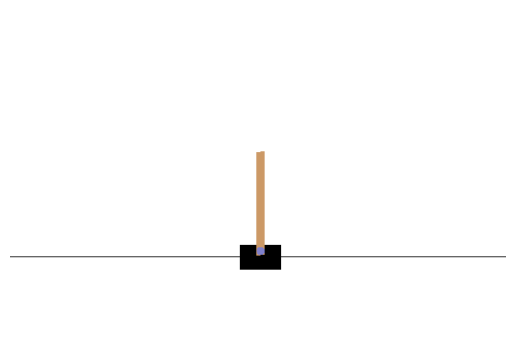

In [2]:
env = gym.make('CartPole-v0')
print('\nEnvironment : CartPole-v0')
print('\nObservation Space:', env.observation_space)
print('\nAction Space: ', env.action_space)
print('\nInitial State: ',env.reset())
print('\nA step in the env:', env.step(1))
print('\n\nRendered Environment: ')
env.reset()
plt.axis('off')
plt.imshow(env.render(mode='rgb_array'))
env.close()
plt.show()

## Training - Obtain Expert Policy

1. **Agent Initialization:**
   - Initialize an agent for Q-learning.

2. **Q-Table Initialization:**
   - Create a Q-table to represent the policy.
   - Dimensions: 10000 x 2 (states x actions).
   - Initialize rewards in the Q-table.

3. **Training with Q-Learning:**
   - Utilize an epsilon-greedy strategy to choose actions during training.
   - Explore with probability ε and exploit with probability 1-ε.

4. **Update Q-Table:**
   - Update Q-values iteratively based on the Q-learning update rule.
   - Q-value for a state-action pair is a weighted sum of the immediate reward and the maximum expected future rewards.

5. **Exploration and Exploitation:**
   - Balance exploration and exploitation through the epsilon-greedy strategy.
   - Exploration allows discovering optimal actions, while exploitation focuses on maximizing immediate rewards.

6. **Iterative Training:**
   - Repeat the training process over multiple episodes or iterations.

7. **Policy:**
   - The Q-table represents the learned policy, with each row corresponding to a state and each column to an action.

8. **Expert Policy for IRL:**
   - The trained Q-learning agent serves as an expert policy for Inverse Reinforcement Learning (IRL).

- The Q-learning algorithm aims to iteratively improve the policy by updating Q-values based on observed rewards, guiding the agent toward optimal actions in different states.

In [3]:
q_trainer = QTrainer(env, nbins=10, GAMMA=0.9, ALPHA=0.01)

print('\nNo. of bins for discretization: ', q_trainer.nbins)
print('\nNo. of states after discretization: ', len(q_trainer.states))



No. of bins for discretization:  10

No. of states after discretization:  14641


In [4]:
# Training

episode_lengths, episode_rewards, expert_Q = q_trainer.q_learning_train(num_episodes=30000)

Training Episodes..:   7%|█               | 2067/30000 [00:04<01:07, 412.81it/s]

Episode: 2000, Epsilon: 0.0224, Reward: 141.0


Training Episodes..:  13%|██▏             | 4042/30000 [00:09<01:20, 322.47it/s]

Episode: 4000, Epsilon: 0.0158, Reward: 200.0


Training Episodes..:  20%|███▏            | 6050/30000 [00:15<01:12, 330.83it/s]

Episode: 6000, Epsilon: 0.0129, Reward: 200.0


Training Episodes..:  27%|████▎           | 8045/30000 [00:22<01:20, 271.33it/s]

Episode: 8000, Epsilon: 0.0112, Reward: 200.0


Training Episodes..:  34%|█████          | 10054/30000 [00:29<01:03, 313.72it/s]

Episode: 10000, Epsilon: 0.0100, Reward: 200.0


Training Episodes..:  40%|██████         | 12057/30000 [00:35<00:56, 319.36it/s]

Episode: 12000, Epsilon: 0.0091, Reward: 200.0


Training Episodes..:  47%|███████        | 14042/30000 [00:41<00:52, 303.04it/s]

Episode: 14000, Epsilon: 0.0085, Reward: 200.0


Training Episodes..:  54%|████████       | 16055/30000 [00:47<00:42, 328.32it/s]

Episode: 16000, Epsilon: 0.0079, Reward: 200.0


Training Episodes..:  60%|█████████      | 18037/30000 [00:53<00:36, 331.75it/s]

Episode: 18000, Epsilon: 0.0075, Reward: 200.0


Training Episodes..:  67%|██████████     | 20061/30000 [01:00<00:31, 310.77it/s]

Episode: 20000, Epsilon: 0.0071, Reward: 200.0


Training Episodes..:  74%|███████████    | 22058/30000 [01:06<00:24, 326.06it/s]

Episode: 22000, Epsilon: 0.0067, Reward: 200.0


Training Episodes..:  80%|████████████   | 24037/30000 [01:13<00:19, 313.84it/s]

Episode: 24000, Epsilon: 0.0065, Reward: 200.0


Training Episodes..:  87%|█████████████  | 26044/30000 [01:19<00:12, 328.23it/s]

Episode: 26000, Epsilon: 0.0062, Reward: 200.0


Training Episodes..:  93%|██████████████ | 28049/30000 [01:25<00:05, 331.12it/s]

Episode: 28000, Epsilon: 0.0060, Reward: 200.0


Training Episodes..: 100%|███████████████| 30000/30000 [01:31<00:00, 328.38it/s]

Episode: 30000, Epsilon: 0.0058, Reward: 200.0


In [5]:
# Save Q table

with open('./data/Expert_Q_table', 'wb') as f:
    pickle.dump(expert_Q, f)
    print(f'Saved Expert Q Table')

Saved Expert Q Table


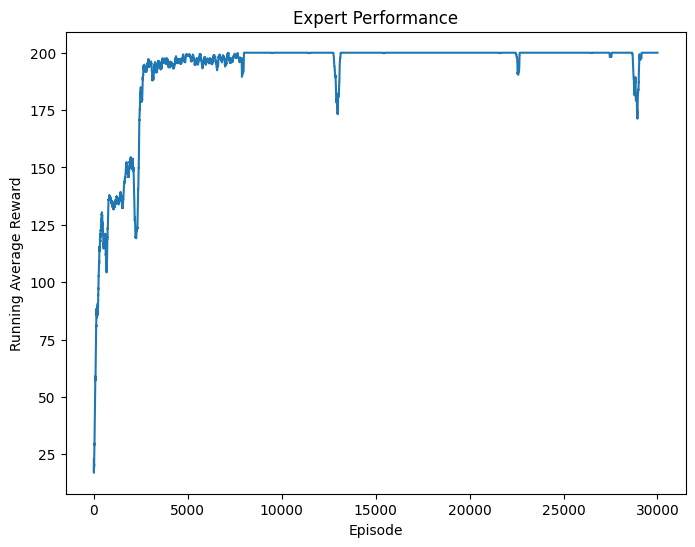

In [6]:
# Plot performance

q_trainer.plot_performance(episode_rewards,title="Expert Performance",save=True,
                 filename='../Results/Q Learning - CartPole/Expert Performance')

In [7]:
# Training result
# Using the learned policy, simulate the environment 1000 times to sample the reward distribution.

expert_reward = q_trainer.run_policy(num_episodes=1000, render=False)

Running Policy...: 100%|███████████████████| 1000/1000 [00:02<00:00, 364.32it/s]


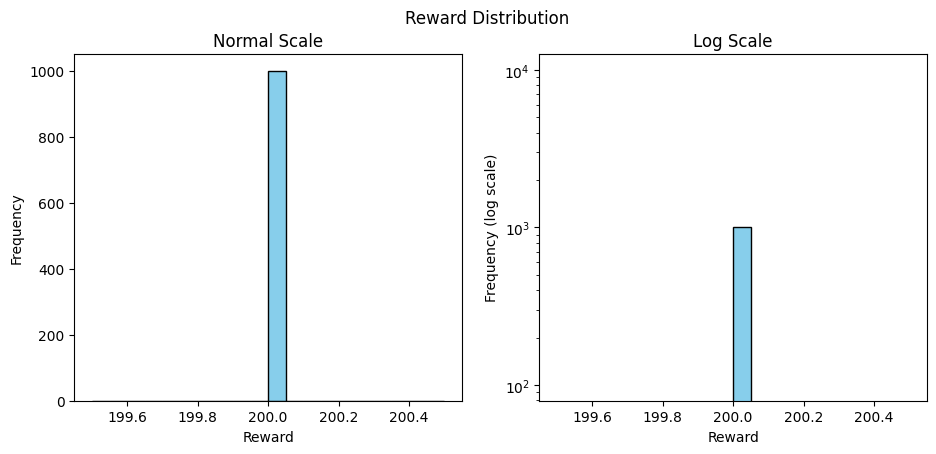

In [8]:
q_trainer.plot_reward_dist(expert_reward)

Running Policy...: 100%|██████████████████████████| 1/1 [00:03<00:00,  3.24s/it]


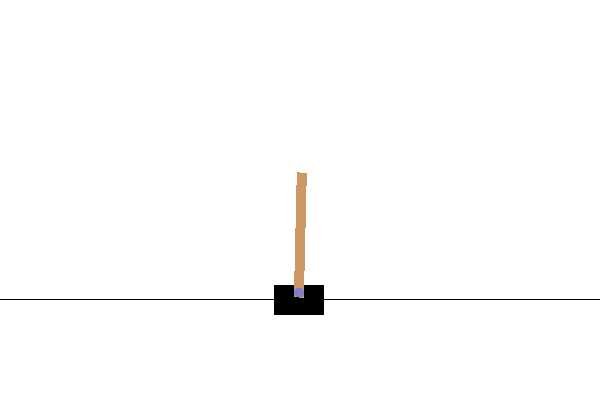

Expert Reward -  [200.0]


In [9]:
# Visualize policy in action

expert_reward = q_trainer.run_policy(expert_Q, num_episodes=1, 
                           render=True, render_filename='../Results/Q Learning - CartPole/Expert Policy')
print('Expert Reward - ',expert_reward)

# IRL Algorithm

* We define some functions for the Apprenticeship Inverse Reinforcement Learning (IRL) algorithm based on the paper by  P. Abbeel and A. Y. Ng titled "Apprenticeship Learning via Inverse Reinforcement Learning."

* To train new agents, instead of utilizing the (predefined) returned reward from the training environment, it incorporates the reward function of the expert derived from the IRL algorithm. This reward function involves a weight term (w) and observation space (Φ(s)) obtained through the IRL algorithm.

* To ensure observation features fall within the [0, 1] range for computing feature expectations, sigmoid function is applied to each element of the feature vector.

In [8]:
def compute_feature_expectation(Q, m=1000, gamma=0.9, bins=q_trainer.bins):
    """
    Compute the average feature expectation using the provided Q-table and environment (Monte Carlo Estimation).

    Parameters:
    - Q: Q-table representing the policy.
    - m: Number of trajectories for feature calculation.
    - gamma: Discount factor for future rewards.
    - bins: Discretization bins for state representation.

    Returns:
    - feature_expectation: Computed average feature expectation.
    """
    
    observation_sum = np.zeros(len(bins))

    for _ in tqdm(range(m), desc='Calculating Feature Expectation..'):
        observation = env.reset()
        done = False
        count = 0

        while not done:
            state = q_trainer.get_state_as_str(q_trainer.assign_bins(observation))
            action = q_trainer.get_best_action_value(state, Q)[0]
            observation, reward, done, _ = env.step(action)
            
            # apply sigmoid function to observation features
            observation = q_trainer.sigmoid(observation)

            # accumulate discounted observation features
            observation_sum += (gamma ** count) * observation  # Σ γ^t * φ
            count += 1

    # average feature expectation
    feature_expectation = observation_sum / m

    print("Feature Expectation:", feature_expectation)
    
    return feature_expectation

In [9]:
# get feature expectation of expert

with open('./data/Expert_Q_table', 'rb') as file:
    expert_Q = pickle.load(file)
    print(f'Loaded Expert Q Table')
    
expert_expectation = compute_feature_expectation(expert_Q, m=10000)

Loaded Expert Q Table


Calculating Feature Expectation..: 100%|█| 10000/10000 [00:01<00:00, 6327.97it/s

Feature Expectation: [3.075727   1.94389841 3.24247302 4.76887682]


## IRL algorithm using Projection method

1. **Initialization:**
   - Randomly pick an initial policy, denoted as π(0).
   - Compute the feature expectation, µ(0), using Monte Carlo or other approximation methods.
   - Set iteration counter i = 1.

2. **Margin Computation:**
   - Compute the margin, t(i), as the maximum margin between the current feature expectation and those of previous policies.
   - Formulate the margin computation as a quadratic program to find the optimal weight vector w(i).

3. **Termination Check:**
   - If the margin t(i) is less than or equal to a predefined threshold ε, terminate the algorithm.

4. **IRL Training:**
   - Use a Reinforcement Learning (RL) algorithm to compute the optimal policy π(i) for the Markov Decision Process (MDP) with rewards defined by the weight vector w(i).

5. **Update Feature Expectation:**
   - Compute or estimate the feature expectation, µ(i), based on the new policy π(i).

6. **Iteration Update:**
   - Increment the iteration counter i.

7. **Repeat:**
   - Return to step 2 and iterate through the process until the termination condition is met.

Upon termination, the algorithm returns a set of policies {π(i) : i = 0 . . . n}, representing a sequence of policies that approximate the expert's behavior.

In [12]:
def projection_method_algorithm(trainer=q_trainer, epsilon=0.0001, iterations=11):
    """
    Function implementing Apprenticeship Learning IRL algorithm using Projection Method.
    
    Parameters:
        trainer (QTrainer): An instance of a Q-learning trainer with IRL training.
        epsilon (float, optional): Termination threshold for the margin.
        iterations (int, optional): Maximum number of iterations.

    Returns:
        Tuple: A tuple containing the following elements:
            - List[QValues]: Learned Q-values for each iteration.
            - List[int]: Average episode lengths during training.
            - List[float]: Margins for each iteration.
    """
    weights = []
    feature_expectation = []
    feature_expectation_bar = []
    learned_Q = []
    margins = []
    avg_episode_length = []

    for i in range(iterations):
        print("Iteration:", i)

        # Step 1: Initialization
        if i == 0:
            initial_Q = q_trainer.init_Q()  # Random initial policy
            feature_expectation.append(compute_feature_expectation(initial_Q))   # µ^(0)
            print("Expert Feature Expectation:", expert_expectation)             # µ_E
            learned_Q.append(initial_Q)     # Learned policy
            weights.append(np.zeros(4))
            margins.append(1)

        else:
            # Step 2: IRL
            # First iteration of step 2 of algorithm
            if i == 1:
                feature_expectation_bar.append(feature_expectation[i - 1])       # µ¯^(0) = µ^(0)
                weights.append(expert_expectation - feature_expectation[i - 1])   # w^(1) = µ_E - µ^(0)
                margins.append(np.linalg.norm((expert_expectation - feature_expectation_bar[i - 1]), 2))
                print("Weight:", weights[i])
                print("Margin:", margins[i])

            # Iterations 2 and onward of step 2 of algorithm
            else:
                A = feature_expectation_bar[i - 2]              # µ¯(i−2)
                B = feature_expectation[i - 1] - A              # (µ(i−1) − µ¯(i−2))
                C = expert_expectation - A                      # µ_E − µ¯(i−2)

                feature_expectation_bar.append(A + (np.dot(B, C) / np.dot(B, B)) * B)  # projection method step

                # w(i) = µ_E − μ¯(i−1)
                weight = expert_expectation - feature_expectation_bar[i - 1]

                # t(i) = ∥µ_E − µ¯(i−1)∥_2
                margin = np.linalg.norm((expert_expectation - feature_expectation_bar[i - 1]), 2)
                
                weights.append(weight)
                margins.append(margin)
                
                print("Margin:", margins[i])
                print("Weight:", weights[i])

            # Step 3: Termination condition
            if margins[i] <= epsilon:
                break                   # terminate with margin ≤ ∈ (or iteration)

            # Step 4: IRL training
            episode_lengths, episode_rewards, learned_Q_i = q_trainer.q_learning_train(irl=True, 
                                                                                       weight=weights[i], 
                                                                                       print_interval=10001)
            learned_Q.append(learned_Q_i)
            avg_episode_length.append(episode_lengths)

            # Step 5: Update feature expectation
            feature_expectation.append(compute_feature_expectation(learned_Q[i]))

        print("")
        
    return learned_Q, avg_episode_length, margins

In [13]:
learned_Q, avg_episode_length, margin = projection_method_algorithm(trainer=q_trainer, iterations=11)

Iteration: 0


Calculating Feature Expectation..: 100%|██| 1000/1000 [00:00<00:00, 5242.73it/s]


Feature Expectation: [3.06119567 1.92130261 3.23044368 4.76881574]
Expert Feature Expectation: [3.07688448 1.94350596 3.24438476 4.77179543]

Iteration: 1
Weight: [0.01568881 0.02220335 0.01394108 0.00297969]
Margin: 0.030697876913072863


Training Episodes..: 100%|███████████████| 10000/10000 [00:22<00:00, 449.10it/s]


Avg Length: 119.0742 
Standard Deviation: 51.142779493883594


Calculating Feature Expectation..: 100%|██| 1000/1000 [00:00<00:00, 6052.91it/s]


Feature Expectation: [3.07650561 1.94504191 3.24117891 4.76223794]

Iteration: 2
Margin: 0.010023584042930283
Weight: [ 1.32508816e-03 -6.87498705e-05  3.86933518e-03  9.15095062e-03]


Training Episodes..: 100%|███████████████| 10000/10000 [00:23<00:00, 429.31it/s]


Avg Length: 121.8443 
Standard Deviation: 39.45219458420532


Calculating Feature Expectation..: 100%|██| 1000/1000 [00:00<00:00, 6191.70it/s]


Feature Expectation: [3.09702807 1.97178985 3.26076757 4.77568039]

Iteration: 3
Margin: 0.0085510230842461
Weight: [-0.00129453 -0.00351157  0.00139816  0.00756031]


Training Episodes..: 100%|███████████████| 10000/10000 [00:21<00:00, 464.69it/s]


Avg Length: 114.7162 
Standard Deviation: 32.46566890670821


Calculating Feature Expectation..: 100%|██| 1000/1000 [00:00<00:00, 5722.11it/s]


Feature Expectation: [3.08388346 1.96077871 3.24844398 4.76076066]

Iteration: 4
Margin: 0.00722251754348014
Weight: [0.00031334 0.00036719 0.00293639 0.00658098]


Training Episodes..: 100%|███████████████| 10000/10000 [00:31<00:00, 321.57it/s]


Avg Length: 164.4665 
Standard Deviation: 37.038934619532455


Calculating Feature Expectation..: 100%|██| 1000/1000 [00:00<00:00, 6327.43it/s]


Feature Expectation: [3.07487196 1.9407507  3.2423089  4.7688739 ]

Iteration: 5
Margin: 0.004920968563666495
Weight: [0.00219783 0.00301571 0.00198201 0.00252241]


Training Episodes..: 100%|███████████████| 10000/10000 [00:28<00:00, 345.49it/s]


Avg Length: 152.211 
Standard Deviation: 42.35021462755531


Calculating Feature Expectation..: 100%|██| 1000/1000 [00:00<00:00, 6290.39it/s]


Feature Expectation: [3.08648141 1.96182827 3.25189864 4.76537621]

Iteration: 6
Margin: 0.0031836191502275387
Weight: [ 5.24754778e-04 -1.10669505e-05  6.35024543e-04  3.07517230e-03]


Training Episodes..: 100%|███████████████| 10000/10000 [00:31<00:00, 319.10it/s]


Avg Length: 165.2067 
Standard Deviation: 40.17013038452825


Calculating Feature Expectation..: 100%|██| 1000/1000 [00:00<00:00, 6232.49it/s]


Feature Expectation: [3.07982173 1.94612758 3.24637475 4.77668521]

Iteration: 7
Margin: 0.0011712656000565666
Weight: [-0.0005608  -0.00082964 -0.00018808  0.00057766]


Training Episodes..: 100%|███████████████| 10000/10000 [00:35<00:00, 280.49it/s]


Avg Length: 186.0645 
Standard Deviation: 37.11408815732915


Calculating Feature Expectation..: 100%|██| 1000/1000 [00:00<00:00, 5191.69it/s]


Feature Expectation: [3.43819586 2.53989499 3.56949625 4.77150644]

Iteration: 8
Margin: 0.0006327375467522166
Weight: [-9.80446541e-05 -6.56755952e-05  2.28720118e-04  5.78029301e-04]


Training Episodes..: 100%|███████████████| 10000/10000 [00:35<00:00, 284.74it/s]


Avg Length: 190.054 
Standard Deviation: 25.28482714989367


Calculating Feature Expectation..: 100%|██| 1000/1000 [00:00<00:00, 6496.15it/s]


Feature Expectation: [3.06961023 1.9484545  3.23725006 4.74767711]

Iteration: 9
Margin: 0.00028095026730865755
Weight: [-2.58323835e-04  4.04814364e-05  7.85788081e-05  6.62455514e-05]


Training Episodes..: 100%|███████████████| 10000/10000 [00:35<00:00, 284.32it/s]


Avg Length: 187.5092 
Standard Deviation: 33.037522839341335


Calculating Feature Expectation..: 100%|██| 1000/1000 [00:00<00:00, 5328.63it/s]


Feature Expectation: [3.43678875 2.53247081 3.56730933 4.77437756]

Iteration: 10
Margin: 0.0002750877676395841
Weight: [-2.31375845e-04  8.46151460e-05  1.02781182e-04  6.64439922e-05]


Training Episodes..: 100%|███████████████| 10000/10000 [00:36<00:00, 272.90it/s]


Avg Length: 190.0386 
Standard Deviation: 28.74756528890751


Calculating Feature Expectation..: 100%|██| 1000/1000 [00:00<00:00, 5880.46it/s]

Feature Expectation: [3.07015691 1.94513089 3.23982733 4.75850935]



In [14]:
# export trained IRL model
with open('./data/Learned_Q_table', 'wb') as f:
    pickle.dump(learned_Q, f)
    print(f'Saved Learned Q Table')

Saved Learned Q Table


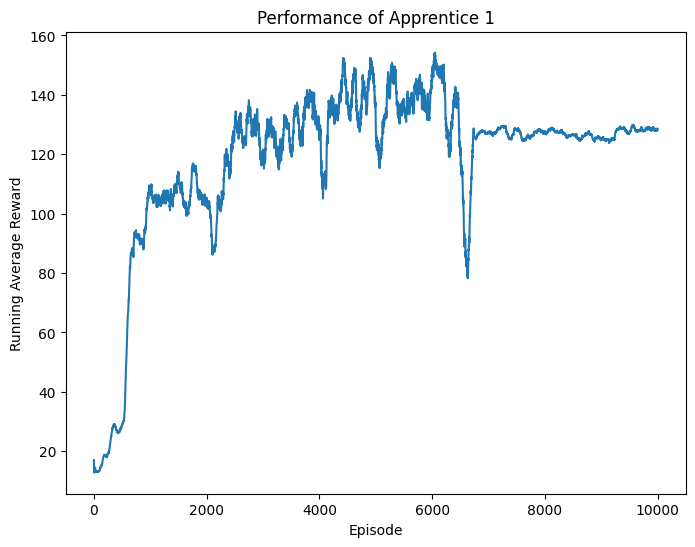

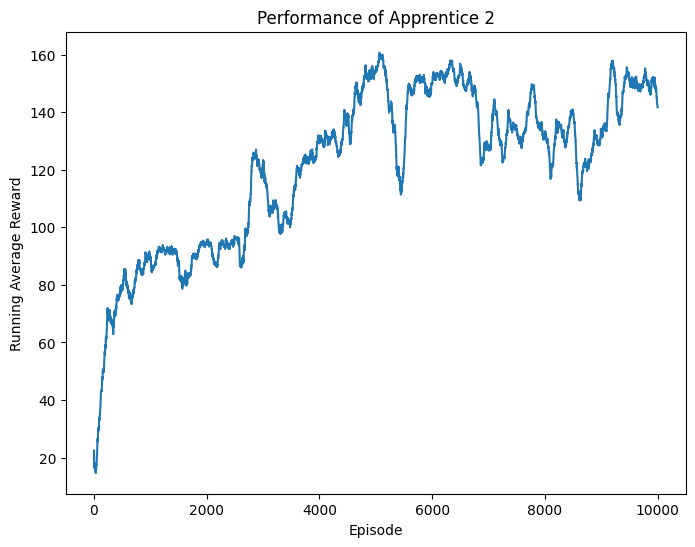

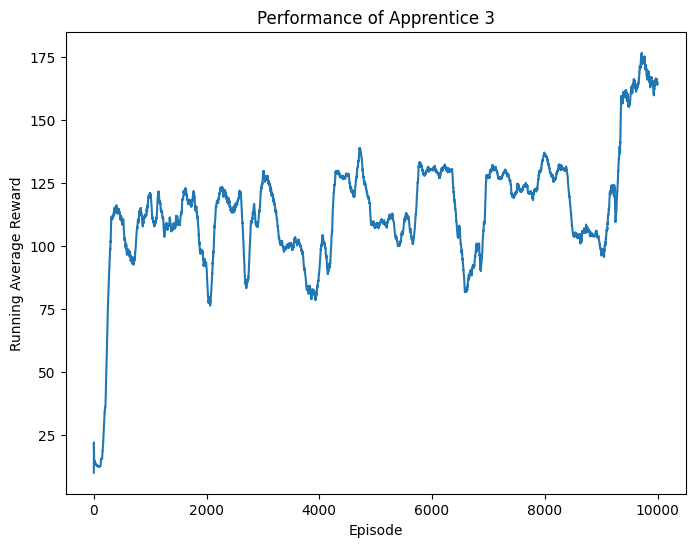

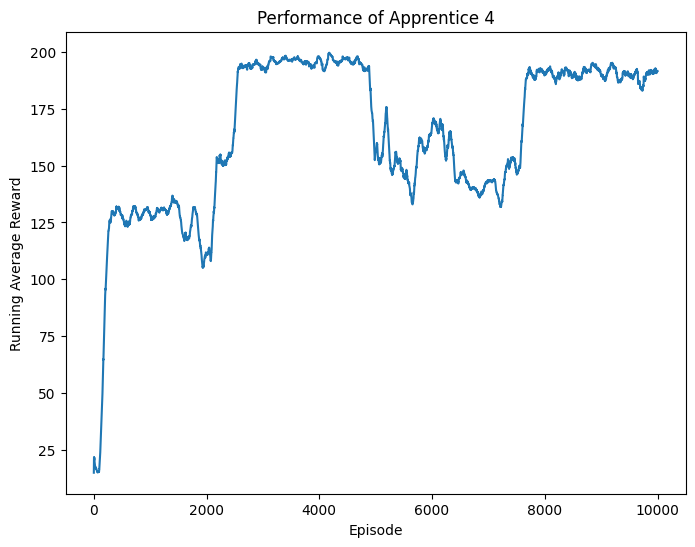

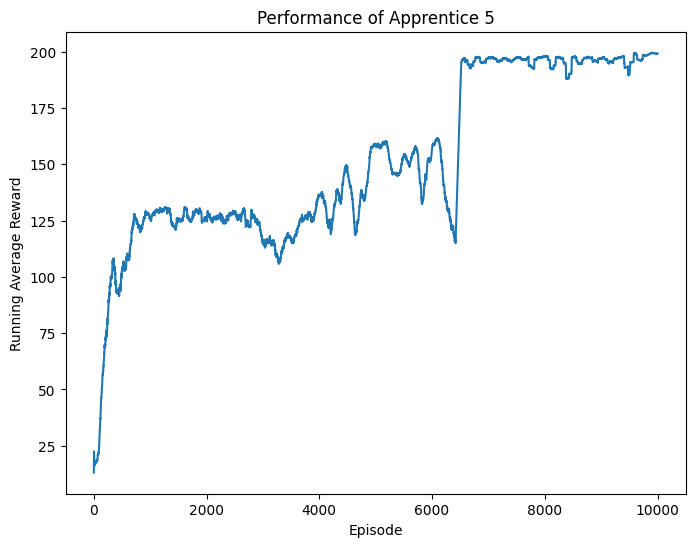

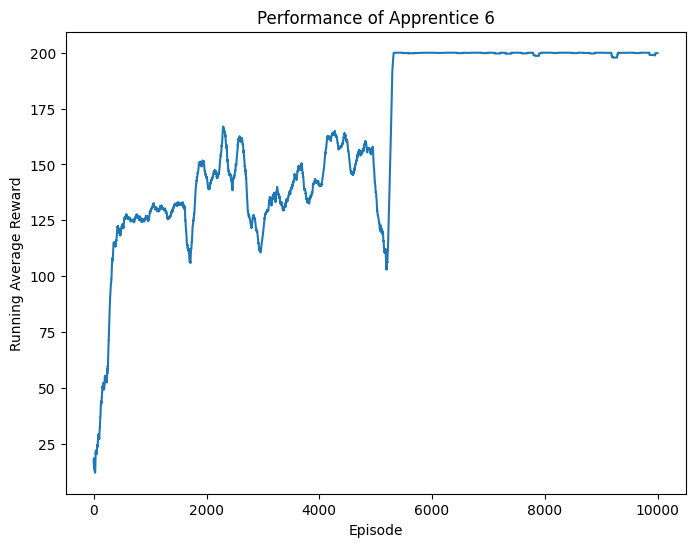

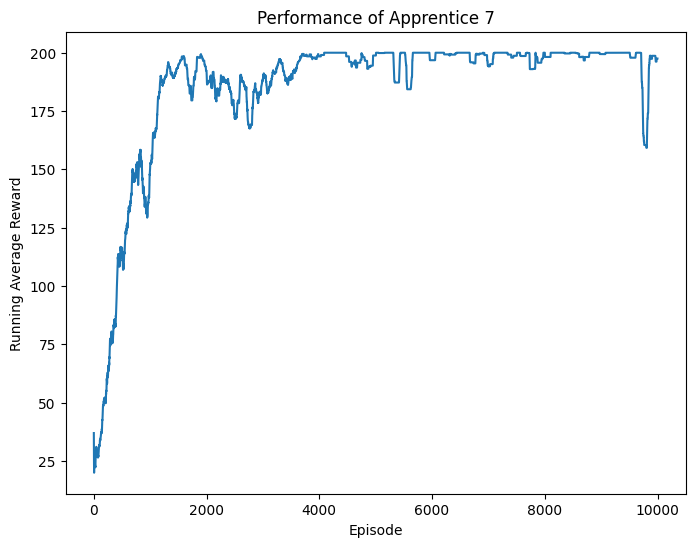

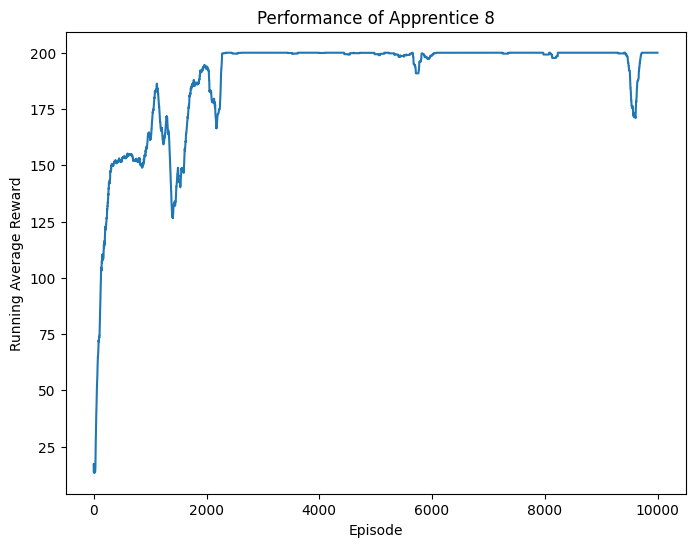

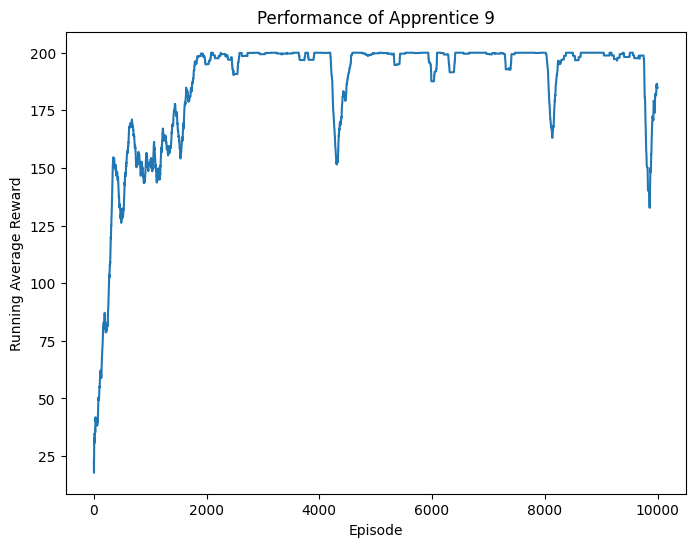

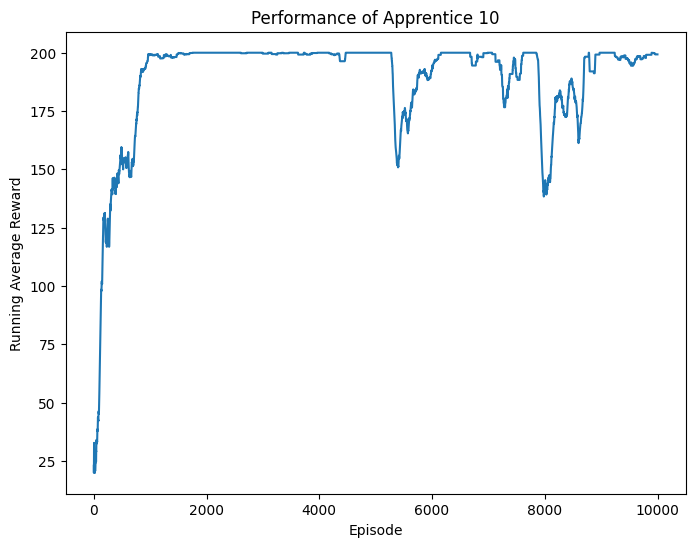

In [15]:
# performance of each apprenctice
    
for i in range(len(avg_episode_length)):
    apprenctice_title = f"Performance of Apprentice {i + 1}"
    q_trainer.plot_performance(avg_episode_length[i], title=apprenctice_title, save=True, 
                     filename=f"../Results/Q Learning - CartPole/Apprentice_{i + 1}_Performance")

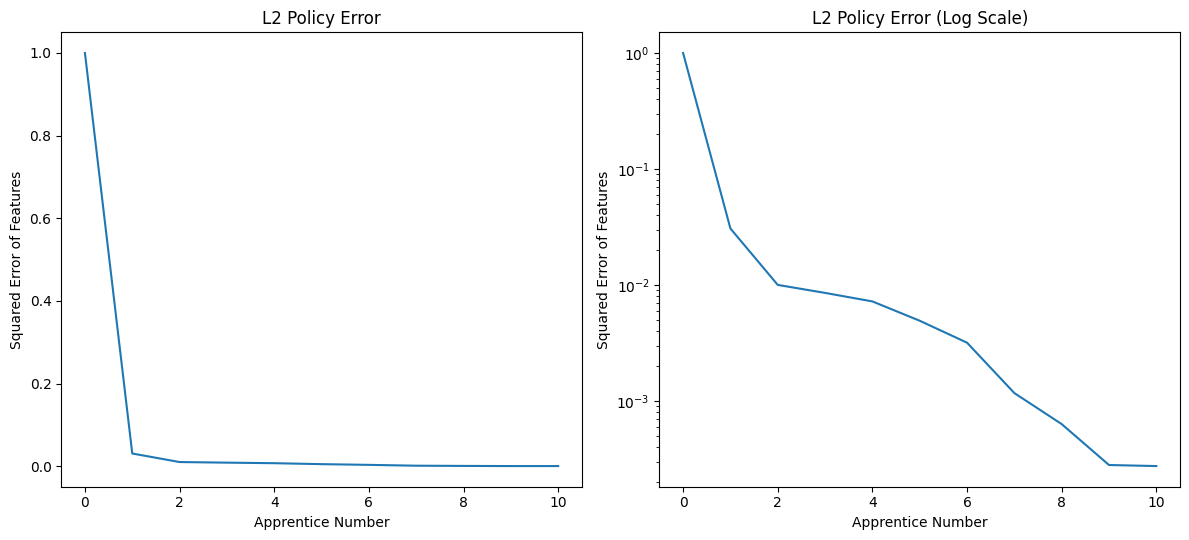

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5.5))

# plot without log scale
axes[0].plot(margin, label="L2 Policy Error")
axes[0].set_title("L2 Policy Error")
axes[0].set_xlabel("Apprentice Number")
axes[0].set_ylabel("Squared Error of Features")

# plot with log scale
axes[1].plot(margin, label="L2 Policy Error")
axes[1].set_title("L2 Policy Error (Log Scale)")
axes[1].set_xlabel("Apprentice Number")
axes[1].set_ylabel("Squared Error of Features")
axes[1].set_yscale("log")

plt.tight_layout()
plt.savefig("../Results/Q Learning - CartPole/Apprentice Policy Error.png")
plt.show()

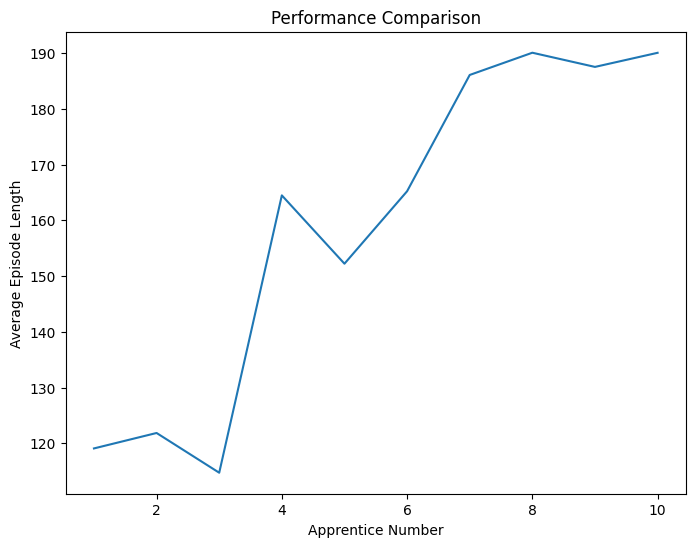

In [17]:
# Showing the performance of each apprentice (relative to the expert)

iteration = []
relative_performance = []
apprentice_performance = []

# average performance for each apprentice
for episode_lengths in avg_episode_length:
    apprentice_performance.append(np.average(episode_lengths))

for i, performance in enumerate(apprentice_performance):
    iteration.append(i + 1)
    relative_performance.append(performance)

plt.figure(figsize=(8,6))
plt.plot(iteration, relative_performance)
plt.xlabel("Apprentice Number")
plt.ylabel("Average Episode Length")
plt.title("Performance Comparison")
plt.savefig("../Results/Q Learning - CartPole/Apprentice Rewards.png")
plt.show()

Running Policy...: 100%|██████████████████████████| 1/1 [00:02<00:00,  2.09s/it]


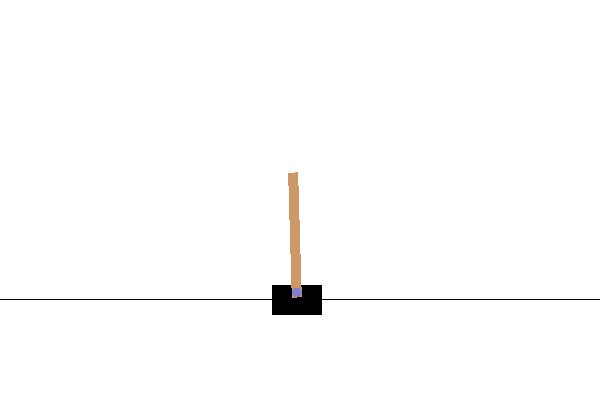

Apprentice 1 -  [128.0]


Running Policy...: 100%|██████████████████████████| 1/1 [00:03<00:00,  3.05s/it]


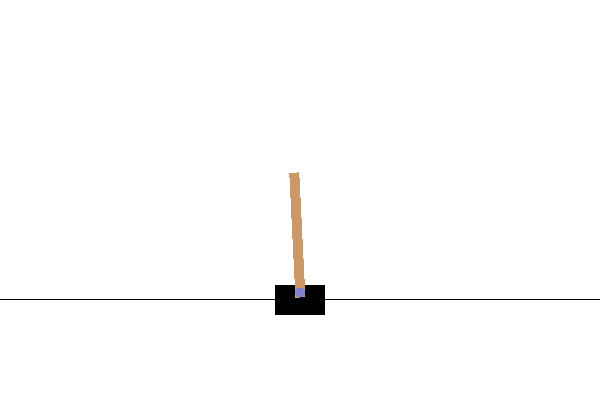

Apprentice 2 -  [186.0]


Running Policy...: 100%|██████████████████████████| 1/1 [00:03<00:00,  3.29s/it]


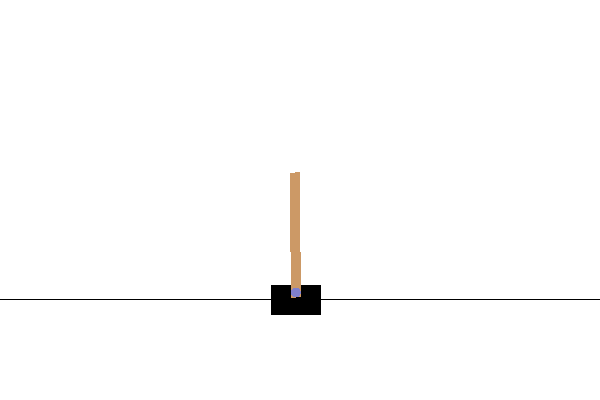

Apprentice 3 -  [200.0]


Running Policy...: 100%|██████████████████████████| 1/1 [00:03<00:00,  3.27s/it]


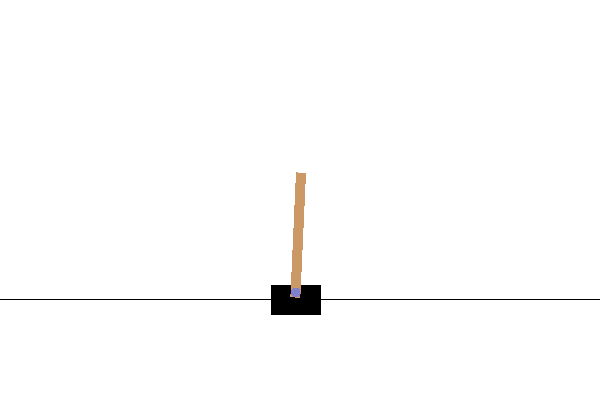

Apprentice 4 -  [200.0]


Running Policy...: 100%|██████████████████████████| 1/1 [00:03<00:00,  3.25s/it]


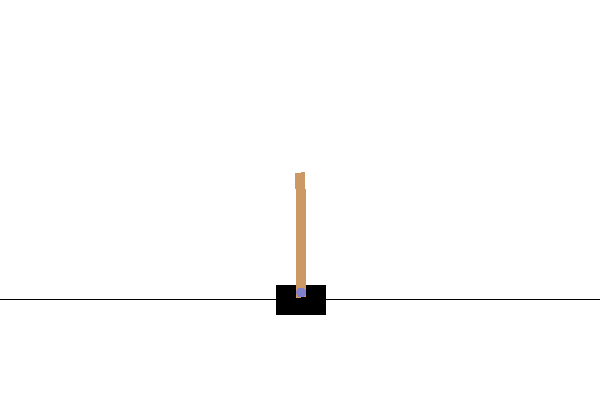

Apprentice 5 -  [200.0]


Running Policy...: 100%|██████████████████████████| 1/1 [00:03<00:00,  3.25s/it]


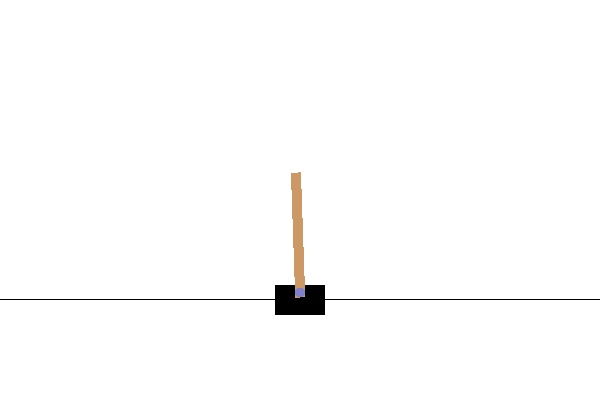

Apprentice 6 -  [200.0]


Running Policy...: 100%|██████████████████████████| 1/1 [00:03<00:00,  3.25s/it]


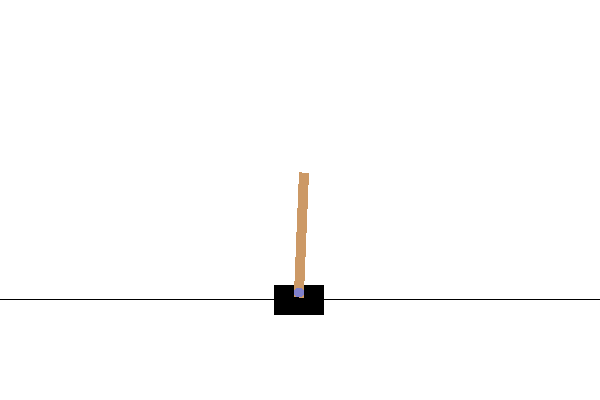

Apprentice 7 -  [200.0]


Running Policy...: 100%|██████████████████████████| 1/1 [00:03<00:00,  3.29s/it]


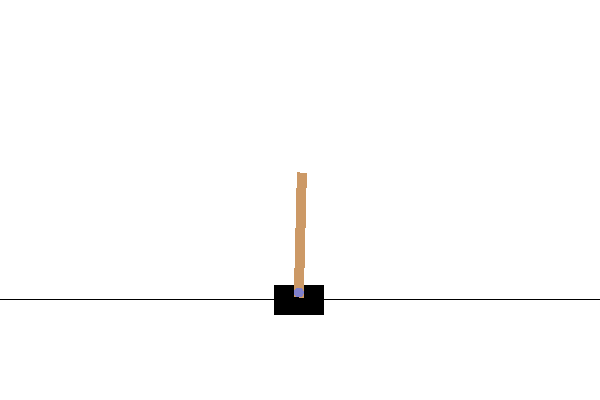

Apprentice 8 -  [200.0]


Running Policy...: 100%|██████████████████████████| 1/1 [00:03<00:00,  3.30s/it]


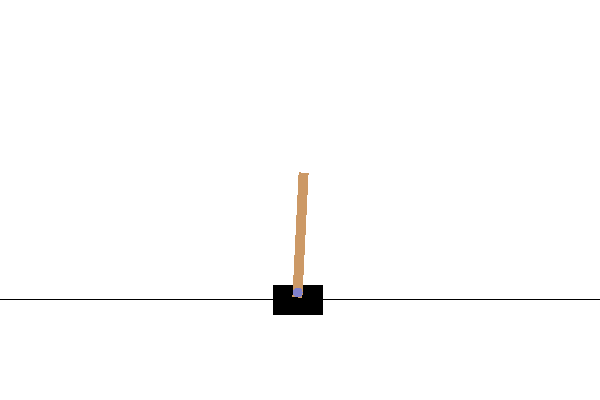

Apprentice 9 -  [200.0]


Running Policy...: 100%|██████████████████████████| 1/1 [00:03<00:00,  3.30s/it]


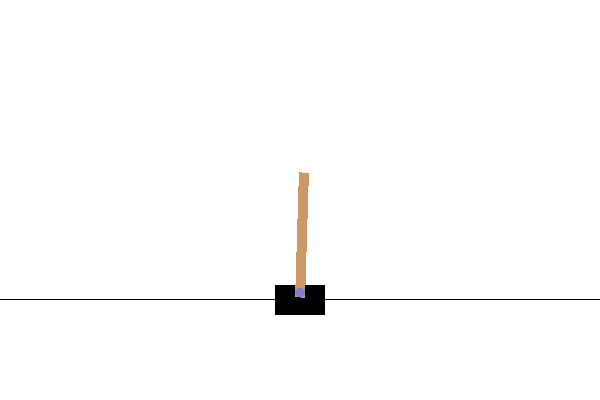

Apprentice 10 -  [200.0]


In [18]:
for apprentice in range(1, len(avg_episode_length)+1):
    apprentice_reward = q_trainer.run_policy(learned_Q[apprentice], num_episodes=1, render=True, 
                                             render_filename=f'../Results/Q Learning - CartPole/Apprentice {apprentice} Policy')
    print(f'Apprentice {apprentice} - ', apprentice_reward)